In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import  StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, classification_report, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestClassifier

In [2]:
# Import dataset
# df = pd.read_csv("https://lead-program-assets.s3.eu-west-3.amazonaws.com/M05-Projects/fraudTest.csv", index_col=0)
df = pd.read_csv("data/fraudTest.csv", index_col=0)

### Data analysis

##### Basic statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

In [4]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 555719

Display of dataset: 


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0



Basics statistics: 


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,544760,NaN,693,14,NaN,341,471,2,924,849,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,2020-10-05 19:37:49,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,Birmingham,...,NaN,NaN,NaN,Film/video editor,1977-03-23,1765bb45b3aa3224b4cdcb6e7a96cee3,NaN,NaN,NaN,NaN
freq,4,NaN,1859,56370,NaN,11443,12146,304886,1474,2423,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,NaN,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,NaN,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,NaN,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000



Percentage of missing values: 


trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

##### Répartition de la target

In [5]:
# Fraud overview
fraud_counts = df['is_fraud'].value_counts()
total_transactions = df.shape[0]
fraud_percentage = (fraud_counts[1] / total_transactions) * 100
print("\nFraudulent vs Non-Fraudulent Transactions:")
print(f"Number of fraudulent transactions: {fraud_counts[1]} ({fraud_percentage:.4f}%)")
print(f"Number of non-fraudulent transactions: {fraud_counts[0]} ({100 - fraud_percentage:.4f}%)")
print()


Fraudulent vs Non-Fraudulent Transactions:
Number of fraudulent transactions: 2145 (0.3860%)
Number of non-fraudulent transactions: 553574 (99.6140%)



Le jeu de données est déséquilibré avec moins de 0,4% de transactions frauduleuses.

Un modèle qui prédirait tout comme non-frauduleux aurait une accuracy de plus de 99,6% mais serait inutile pour détecter les fraudes.
Il va donc falloir se baser sur d'autres métriques comme le F1-score ou le recall pour évaluer les modèles.

### Features engineering

In [6]:
df['distance'] = (((df['lat'] - df['merch_lat'])*np.cos(np.radians((df['long'] + df['merch_long'])/2)))**2 + (df['long'] - df['merch_long'])**2)**1/2*111.12
df['age'] = pd.to_numeric(2025 - pd.to_datetime(df['dob']).dt.year)
df['trans_dayofweek'] = pd.to_datetime(df['trans_date_trans_time']).dt.day_name()
df['trans_month'] = pd.to_datetime(df['trans_date_trans_time']).dt.month_name()
# df['group_merchant'] = df['merchant'].str.removeprefix("fraud_").str.split().str[0].str.split("-").str[0].str.removesuffix(",")

In [7]:
df_prep = df.drop(columns=['cc_num', 'trans_date_trans_time', 'unix_time','first', 'last', 'street', 'city','lat', 'long', 'job', 'dob', 'merchant', 'merch_lat', 'merch_long', 'trans_num'])

In [8]:
# Basic stats
print("Number of rows : {}".format(df_prep.shape[0]))
print()

print("Display of dataset: ")
display(df_prep.head())
print()

print("Basics statistics: ")
data_desc = df_prep.describe(include='all')
display(data_desc)
print()

Number of rows : 555719

Display of dataset: 


,category,amt,gender,state,zip,city_pop,is_fraud,distance,age,trans_dayofweek,trans_month
0,personal_care,2.86,M,SC,29209,333497,0,3.908568,57,Sunday,June
1,personal_care,29.84,F,UT,84002,302,0,17.581314,35,Sunday,June
2,health_fitness,41.28,F,NY,11710,34496,0,24.307959,55,Sunday,June
3,misc_pos,60.05,M,FL,32780,54767,0,0.310033,38,Sunday,June
4,travel,3.19,M,MI,49632,1126,0,42.008917,70,Sunday,June



Basics statistics: 


,category,amt,gender,state,zip,city_pop,is_fraud,distance,age,trans_dayofweek,trans_month
count,555719,555719.000000,555719,555719,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719,555719
unique,14,NaN,2,50,NaN,NaN,NaN,NaN,NaN,7,7
top,gas_transport,NaN,F,TX,NaN,NaN,NaN,NaN,NaN,Monday,December
freq,56370,NaN,304886,40393,NaN,NaN,NaN,NaN,NaN,115136,139538
mean,NaN,69.392810,NaN,NaN,48842.628015,8.822189e+04,0.003860,19.502532,51.636237,NaN,NaN
std,NaN,156.745941,NaN,NaN,26855.283328,3.003909e+05,0.062008,16.719314,17.418528,NaN,NaN
min,NaN,1.000000,NaN,NaN,1257.000000,2.300000e+01,0.000000,0.000023,20.000000,NaN,NaN
25%,NaN,9.630000,NaN,NaN,26292.000000,7.410000e+02,0.000000,4.493184,38.000000,NaN,NaN
50%,NaN,47.290000,NaN,NaN,48174.000000,2.408000e+03,0.000000,14.997347,50.000000,NaN,NaN
75%,NaN,83.010000,NaN,NaN,72011.000000,1.968500e+04,0.000000,32.307773,63.000000,NaN,NaN


### EDA

##### Analyse de la fraude par jour de la semaine

In [9]:
# Analyzing fraud by day of week
#Tidy up the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Create new columns to understand the distribution of data according to the days of the week
day_names, day_totals, day_fraud, day_fraud_rates, day_avg_fraud = [], [], [], [], []

print("Day-by-day performance analysis:")
print("Day        | Total   |   Fraud | Fraud Rate| Avg Fraud")

for day in days_order:
    day_data = df_prep[df_prep['trans_dayofweek'] == day]
    total = len(day_data)
    fraud = len(day_data[day_data['is_fraud'] == 1])
    fraud_rate = (fraud / total * 100) if total > 0 else 0
    avg_fraud = df_prep['is_fraud'].mean()*100
    
    day_names.append(day)
    day_totals.append(total)
    day_fraud.append(fraud)
    day_fraud_rates.append(fraud_rate)
    day_avg_fraud.append(avg_fraud)
    
    print(f"{day:10} | {total:7} | {fraud:7} | {fraud_rate:8.2f}% | {avg_fraud:6.2f}%")

Day-by-day performance analysis:
Day        | Total   |   Fraud | Fraud Rate| Avg Fraud
Monday     |  115136 |     302 |     0.26% |   0.39%
Tuesday    |  110113 |     331 |     0.30% |   0.39%
Wednesday  |   52840 |     266 |     0.50% |   0.39%
Thursday   |   59456 |     309 |     0.52% |   0.39%
Friday     |   62806 |     297 |     0.47% |   0.39%
Saturday   |   62270 |     266 |     0.43% |   0.39%
Sunday     |   93098 |     374 |     0.40% |   0.39%


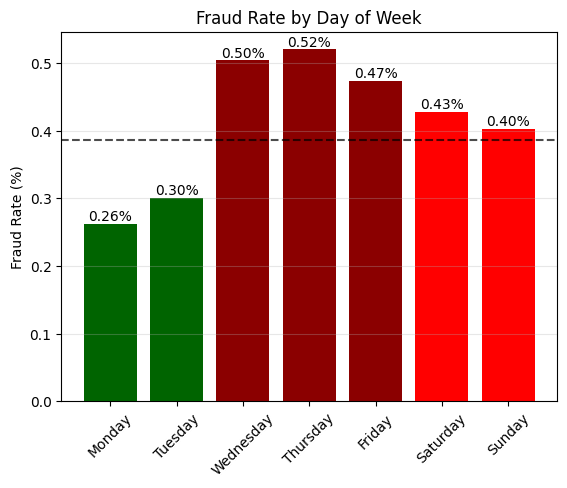

In [10]:
# Fraud Rate by Day of Week graph

plt.figure()
day_colors = ['darkred' if rate > avg_fraud + 0.05 else 'red' if rate > avg_fraud 
              else 'darkgreen' if rate < avg_fraud - 0.05 else 'green' 
              for rate in day_fraud_rates]

plt.bar(day_names, day_fraud_rates, color=day_colors)
plt.title('Fraud Rate by Day of Week')
plt.ylabel('Fraud Rate (%)')
plt.axhline(y=avg_fraud, color='black', linestyle='--', alpha=0.7)
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45)
for i, rate in enumerate(day_fraud_rates):
    plt.text(i, rate +0.005, f'{rate:.2f}%', ha='center')
plt.show()

##### Analyse de la fraude par mois

In [11]:
# Analyzing fraud by month of year
#Tidy up the months of the year
months_order = ['January', 'February', 'March', 'April', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Create new columns to understand the distribution of data according to the months of the year
month_names, month_totals, month_fraud, month_fraud_rates, month_avg_fraud = [], [], [], [], []

print("Month-by-month performance analysis:")
print("Month      | Total   |   Fraud | Fraud Rate| Avg Fraud")

for month in months_order:
    month_data = df_prep[df_prep['trans_month'] == month]
    total = len(month_data)
    fraud = len(month_data[month_data['is_fraud'] == 1])
    fraud_rate = (fraud / total * 100) if total > 0 else 0
    avg_fraud = df_prep['is_fraud'].mean()*100
    
    month_names.append(month)
    month_totals.append(total)
    month_fraud.append(fraud)
    month_fraud_rates.append(fraud_rate)
    month_avg_fraud.append(avg_fraud)
    
    print(f"{month:10} | {total:7} | {fraud:7} | {fraud_rate:8.2f}% | {avg_fraud:6.2f}%")

Month-by-month performance analysis:
Month      | Total   |   Fraud | Fraud Rate| Avg Fraud
January    |       0 |       0 |     0.00% |   0.39%
February   |       0 |       0 |     0.00% |   0.39%
March      |       0 |       0 |     0.00% |   0.39%
April      |       0 |       0 |     0.00% |   0.39%
June       |   30058 |     133 |     0.44% |   0.39%
July       |   85848 |     321 |     0.37% |   0.39%
August     |   88759 |     415 |     0.47% |   0.39%
September  |   69533 |     340 |     0.49% |   0.39%
October    |   69348 |     384 |     0.55% |   0.39%
November   |   72635 |     294 |     0.40% |   0.39%
December   |  139538 |     258 |     0.18% |   0.39%


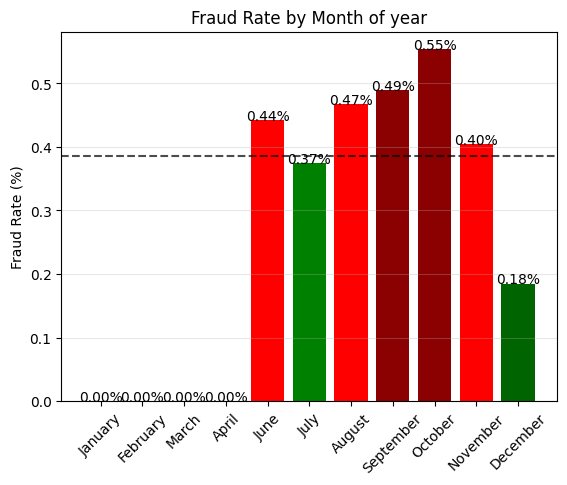

In [12]:
# Fraud Rate by Month of Year graph

plt.figure()
month_colors = ['darkred' if rate > avg_fraud + 0.1 else 'red' if rate > avg_fraud 
              else 'darkgreen' if rate < avg_fraud - 0.1 else 'green' 
              for rate in month_fraud_rates]

plt.bar(month_names, month_fraud_rates, color=month_colors)
plt.title('Fraud Rate by Month of year')
plt.ylabel('Fraud Rate (%)')
plt.axhline(y=avg_fraud, color='black', linestyle='--', alpha=0.7)
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45)
for i, rate in enumerate(month_fraud_rates):
    plt.text(i, rate , f'{rate:.2f}%', ha='center')
plt.show()

On constate que le jeu d'entrainement ne contient pas de données sur les 4 premiers mois de l'année. Il faudra réentrainer le modèle lorsque l'on disposera de données pour ces 4 premiers mois car sinon il risque d'être moins performant sur ceux ci.

##### Analyse de la fraude par genre

In [13]:
# Analyzing fraud by gender
genders = ['F', 'M']

#Create new columns to understand the distribution of data
gender_names, gender_totals, gender_fraud, gender_fraud_rates, gender_avg_fraud = [], [], [], [], []

print("Gender performance analysis:")
print("Gender     | Total   |   Fraud | Fraud Rate| Avg Fraud")

for gender in genders:
    gender_data = df_prep[df_prep['gender'] == gender]
    total = len(gender_data)
    fraud = len(gender_data[gender_data['is_fraud'] == 1])
    fraud_rate = (fraud / total * 100) if total > 0 else 0
    avg_fraud = df_prep['is_fraud'].mean()*100
    
    gender_names.append(gender)
    gender_totals.append(total)
    gender_fraud.append(fraud)
    gender_fraud_rates.append(fraud_rate)
    gender_avg_fraud.append(avg_fraud)
    
    print(f"{gender:10} | {total:7} | {fraud:7} | {fraud_rate:8.2f}% | {avg_fraud:6.2f}%")

Gender performance analysis:
Gender     | Total   |   Fraud | Fraud Rate| Avg Fraud
F          |  304886 |    1164 |     0.38% |   0.39%
M          |  250833 |     981 |     0.39% |   0.39%


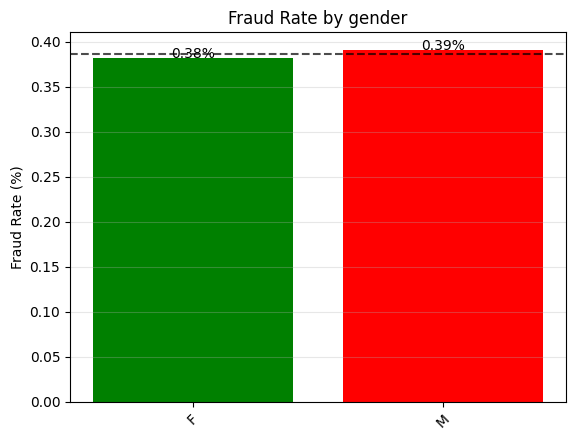

In [14]:
# Fraud Rate by gender graph

plt.figure()
gender_colors = ['darkred' if rate > avg_fraud + 0.1 else 'red' if rate > avg_fraud 
              else 'darkgreen' if rate < avg_fraud - 0.1 else 'green' 
              for rate in gender_fraud_rates]

plt.bar(gender_names, gender_fraud_rates, color=gender_colors)
plt.title('Fraud Rate by gender')
plt.ylabel('Fraud Rate (%)')
plt.axhline(y=avg_fraud, color='black', linestyle='--', alpha=0.7)
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45)
for i, rate in enumerate(gender_fraud_rates):
    plt.text(i, rate , f'{rate:.2f}%', ha='center')
plt.show()

##### Analyse de la fraude par catégorie

In [15]:
# Analyzing fraud by category
categories = df_prep['category'].unique().tolist()


#Create new columns to understand the distribution of data
category_names, category_totals, category_fraud, category_fraud_rates, category_avg_fraud = [], [], [], [], []

print("category performance analysis:")
print("category        | Total   |   Fraud | Fraud Rate| Avg Fraud")

for category in categories:
    category_data = df_prep[df_prep['category'] == category]
    total = len(category_data)
    fraud = len(category_data[category_data['is_fraud'] == 1])
    fraud_rate = (fraud / total * 100) if total > 0 else 0
    avg_fraud = df_prep['is_fraud'].mean()*100
    
    category_names.append(category)
    category_totals.append(total)
    category_fraud.append(fraud)
    category_fraud_rates.append(fraud_rate)
    category_avg_fraud.append(avg_fraud)
    
    print(f"{category:15} | {total:7} | {fraud:7} | {fraud_rate:8.2f}% | {avg_fraud:6.2f}%")

category performance analysis:
category        | Total   |   Fraud | Fraud Rate| Avg Fraud
personal_care   |   39327 |      70 |     0.18% |   0.39%
health_fitness  |   36674 |      52 |     0.14% |   0.39%
misc_pos        |   34574 |      72 |     0.21% |   0.39%
travel          |   17449 |      40 |     0.23% |   0.39%
kids_pets       |   48692 |      65 |     0.13% |   0.39%
shopping_pos    |   49791 |     213 |     0.43% |   0.39%
food_dining     |   39268 |      54 |     0.14% |   0.39%
home            |   52345 |      67 |     0.13% |   0.39%
entertainment   |   40104 |      59 |     0.15% |   0.39%
shopping_net    |   41779 |     506 |     1.21% |   0.39%
misc_net        |   27367 |     267 |     0.98% |   0.39%
grocery_pos     |   52553 |     485 |     0.92% |   0.39%
gas_transport   |   56370 |     154 |     0.27% |   0.39%
grocery_net     |   19426 |      41 |     0.21% |   0.39%


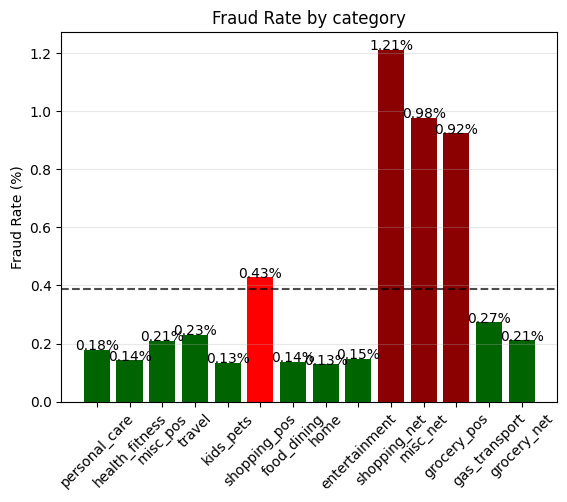

In [16]:
# Fraud Rate by category graph

plt.figure()
category_colors = ['darkred' if rate > avg_fraud + 0.1 else 'red' if rate > avg_fraud 
              else 'darkgreen' if rate < avg_fraud - 0.1 else 'green' 
              for rate in category_fraud_rates]

plt.bar(category_names, category_fraud_rates, color=category_colors)
plt.title('Fraud Rate by category')
plt.ylabel('Fraud Rate (%)')
plt.axhline(y=avg_fraud, color='black', linestyle='--', alpha=0.7)
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45)
for i, rate in enumerate(category_fraud_rates):
    plt.text(i, rate , f'{rate:.2f}%', ha='center')
plt.show()

##### Analyse de la fraude par état

In [17]:
# Analyzing fraud by category
states = sorted(df_prep['state'].unique())


#Create new columns to understand the distribution of data
state_names, state_totals, state_fraud, state_fraud_rates, state_avg_fraud = [], [], [], [], []

print("State performance analysis:")
print("State   | Total   |   Fraud | Fraud Rate| Avg Fraud")

for state in states:
    state_data = df_prep[df_prep['state'] == state]
    total = len(state_data)
    fraud = len(state_data[state_data['is_fraud'] == 1])
    fraud_rate = (fraud / total * 100) if total > 0 else 0
    avg_fraud = df_prep['is_fraud'].mean()*100
    
    state_names.append(state)
    state_totals.append(total)
    state_fraud.append(fraud)
    state_fraud_rates.append(fraud_rate)
    state_avg_fraud.append(avg_fraud)
    
    print(f"{state:7} | {total:7} | {fraud:7} | {fraud_rate:8.2f}% | {avg_fraud:6.2f}%")

State performance analysis:
State   | Total   |   Fraud | Fraud Rate| Avg Fraud
AK      |     843 |      14 |     1.66% |   0.39%
AL      |   17532 |      63 |     0.36% |   0.39%
AR      |   13484 |      34 |     0.25% |   0.39%
AZ      |    4592 |      27 |     0.59% |   0.39%
CA      |   24135 |      76 |     0.31% |   0.39%
CO      |    5886 |       2 |     0.03% |   0.39%
CT      |    3277 |      40 |     1.22% |   0.39%
DC      |    1517 |      10 |     0.66% |   0.39%
FL      |   18104 |      53 |     0.29% |   0.39%
GA      |   11277 |      58 |     0.51% |   0.39%
HI      |    1090 |       9 |     0.83% |   0.39%
IA      |   11819 |      69 |     0.58% |   0.39%
ID      |    2490 |      22 |     0.88% |   0.39%
IL      |   18960 |      76 |     0.40% |   0.39%
IN      |   11959 |      75 |     0.63% |   0.39%
KS      |    9943 |      37 |     0.37% |   0.39%
KY      |   12506 |      67 |     0.54% |   0.39%
LA      |    8988 |      22 |     0.24% |   0.39%
MA      |    5186 | 

<Figure size 640x480 with 0 Axes>

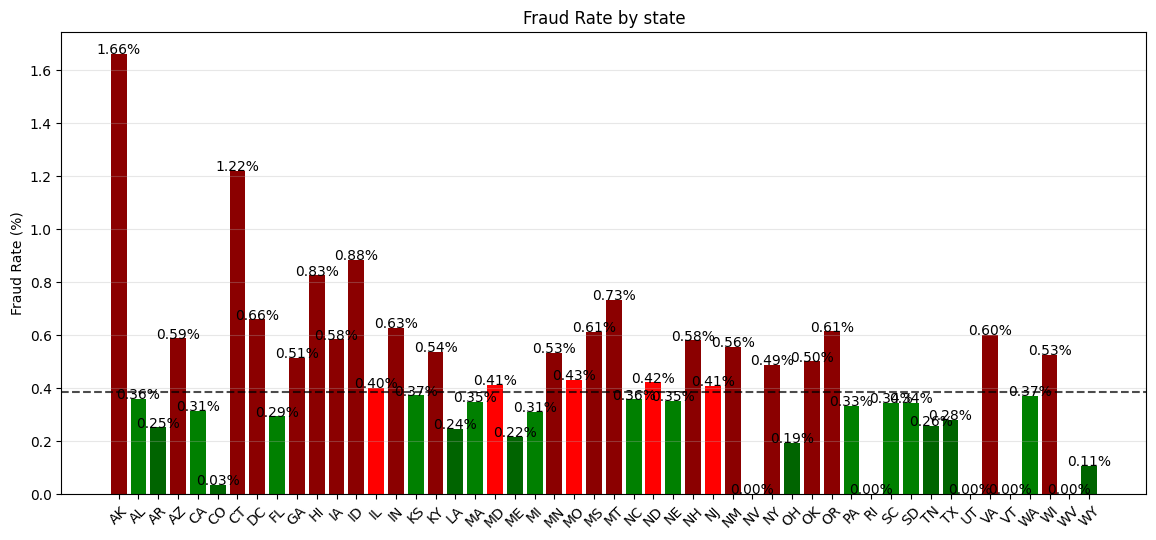

In [18]:
# Fraud Rate by state graph

plt.figure()
state_colors = ['darkred' if rate > avg_fraud + 0.1 else 'red' if rate > avg_fraud 
              else 'darkgreen' if rate < avg_fraud - 0.1 else 'green' 
              for rate in state_fraud_rates]
plt.figure(figsize=(14, 6))  
plt.bar(state_names, state_fraud_rates, color=state_colors)
plt.title('Fraud Rate by state')
plt.ylabel('Fraud Rate (%)')
plt.axhline(y=avg_fraud, color='black', linestyle='--', alpha=0.7)
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45)
for i, rate in enumerate(state_fraud_rates):
    plt.text(i, rate , f'{rate:.2f}%', ha='center')
plt.show()

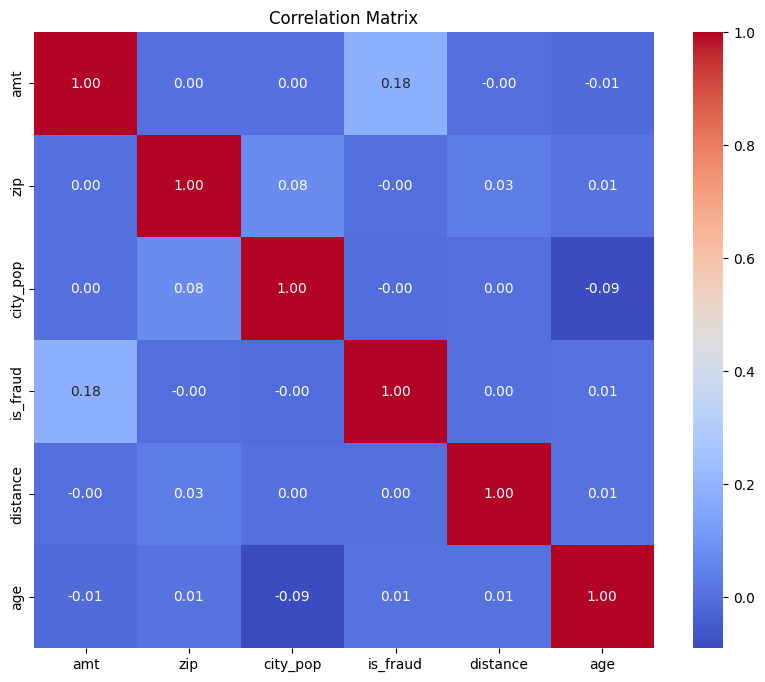

In [19]:
# matrice de correlation
import seaborn as sns
corr = df_prep.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()




### Preprocessing

In [20]:
# Separate target variable Y from features X
print("Separating labels from features...")

features_list = df_prep.drop(columns=['is_fraud']).columns.tolist()
target_variable = 'is_fraud'
X = df_prep.loc[:,features_list]
Y = df_prep.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

X :
         category    amt gender state    zip  city_pop   distance  age  \
0   personal_care   2.86      M    SC  29209    333497   3.908568   57   
1   personal_care  29.84      F    UT  84002       302  17.581314   35   
2  health_fitness  41.28      F    NY  11710     34496  24.307959   55   
3        misc_pos  60.05      M    FL  32780     54767   0.310033   38   
4          travel   3.19      M    MI  49632      1126  42.008917   70   

  trans_dayofweek trans_month  
0          Sunday        June  
1          Sunday        June  
2          Sunday        June  
3          Sunday        June  
4          Sunday        June  


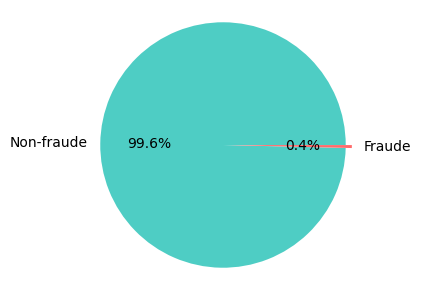

In [21]:
# Pie chart of fraud vs non-fraud
plt.figure(figsize=(4, 3))
colors = ['#4ecdc4','#ff6b6b']  # Rouge pour fraude, turquoise pour non-fraude
explode = (0.05, 0)  # Légèrement séparer la première tranche

plt.pie(Y.value_counts().values, 
        labels=['Fraude' if val else 'Non-fraude' for val in Y.value_counts().index],
        autopct='%1.1f%%',  # Afficher les pourcentages avec 1 décimale
        startangle=0,
        colors=colors,
        explode=explode)

plt.axis('equal')  # Assure que le camembert est circulaire
plt.tight_layout()
plt.show()

In [22]:
## Statify splitting when you're training a classification model !
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y ,test_size = 0.2, stratify = Y, random_state = 42)

In [23]:
numeric_features = []
categorical_features = []
# Assurez-vous que X est votre DataFrame
for col_name in X.columns:
    dtype = X[col_name].dtype
    if dtype in ['int64', 'float64', 'int32', 'float32']:
        numeric_features.append(col_name)
    elif dtype == 'bool':
        numeric_features.append(col_name)  # Ou categorical_features.append(col_name) selon le traitement souhaité
    else:  # pour 'object' et d'autres types non numériques
        categorical_features.append(col_name)

print('Found numeric features:', numeric_features)
print('Found categorical features:', categorical_features)

Found numeric features: ['amt', 'zip', 'city_pop', 'distance', 'age']
Found categorical features: ['category', 'gender', 'state', 'trans_dayofweek', 'trans_month']


In [24]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()), 
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) 
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! 
print('...Done.')
print(X_test[0:5,:])

Performing preprocessings on train set...
             category     amt gender state    zip  city_pop   distance  age  \
219591  entertainment   18.25      M    MI  48636       864  31.890992   83   
385043    grocery_pos  192.53      F    NC  28659     21134  48.289163   41   
270811  gas_transport   43.90      M    NM  87540       923  50.348752   61   
270180       misc_net    1.25      M    MS  39665      1196  10.237800   67   
551235         travel    9.99      M    NY  12410       397  13.326942   94   

       trans_dayofweek trans_month  
219591          Monday   September  
385043       Wednesday    November  
270811         Tuesday   September  
270180         Tuesday   September  
551235       Wednesday    December  
...Done.
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 48 stored elements and shape (5, 80)>
  Coords	Values
  (0, 0)	-0.3318637120123301
  (0, 1)	-0.00809961975658288
  (0, 2)	-0.2904120011023858
  (0, 3)	0.7415399091501271
  (0, 4)	1.800374564

### Entrainement des modèles

In [37]:
# Définir une liste pour stocker les performances des modèles que l'on va tester
models_perfs = []

##### Test d'une régression logistique

In [38]:
classifier = LogisticRegression(max_iter=500, random_state=42)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=500, random_state=42)

In [39]:
# Accuracy ==> ne sert pas à grand chose puisqu'on a seulement 0,4% de fraudes dans le dataset
print('Train accuracy : {}\nTest accuracy : {}'.format(classifier.score(X_train, Y_train), classifier.score(X_test, Y_test)))

Train accuracy : 0.9958522184108418
Test accuracy : 0.9959152090981069


In [40]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = classifier.predict_proba(X_train)
print("...Done.")
print(Y_train_proba[:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = classifier.predict_proba(X_test)
print("...Done.")
print(Y_test_proba[:5])
print()

Predictions on training set...
...Done.
[0 0 0 0 0]

Probabilities on training set...
...Done.
[[9.98568972e-01 1.43102795e-03]
 [9.85437973e-01 1.45620268e-02]
 [9.95655878e-01 4.34412206e-03]
 [9.89271165e-01 1.07288350e-02]
 [9.99899057e-01 1.00942541e-04]]

Predictions on test set...
...Done.
[0 0 0 0 0]

Probabilities on test set...
...Done.
[[9.98781669e-01 1.21833053e-03]
 [9.92852547e-01 7.14745264e-03]
 [9.98856344e-01 1.14365623e-03]
 [9.99021214e-01 9.78785735e-04]
 [9.96987460e-01 3.01253999e-03]]



In [41]:
print("Classification report on train set:")
print(classification_report(Y_train, Y_train_pred))
print()
print("Classification report on test set:")
print(classification_report(Y_test, Y_test_pred))

Classification report on train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    442859
           1       0.00      0.00      0.00      1716

    accuracy                           1.00    444575
   macro avg       0.50      0.50      0.50    444575
weighted avg       0.99      1.00      0.99    444575


Classification report on test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



In [42]:
# Calcul des métriques et stockage des performances du modèle
model_name = "Simple Logistic Regression"
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1 = f1_score(Y_train, Y_train_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1 = f1_score(Y_test, Y_test_pred)

models_perfs.append({
    'Model': model_name,
    'Train Precision': train_precision,
    'Train Recall': train_recall,
    'Train F1-Score': train_f1,
    'Test Precision': test_precision,
    'Test Recall': test_recall,
    'Test F1-Score': test_f1
})

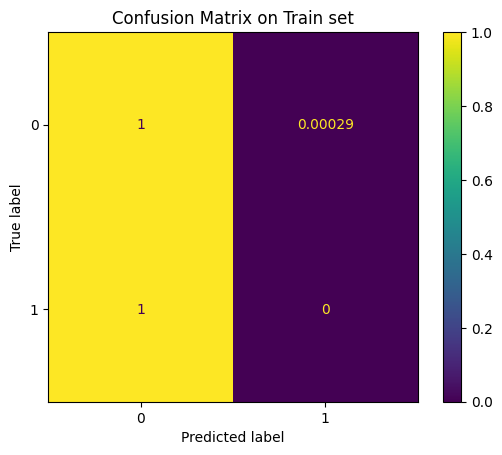

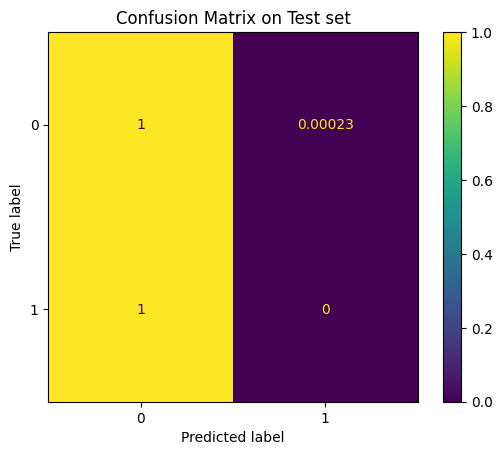

In [43]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
# taille de la figure
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
plt.show()

Avec une régression linéaire sans paramétrage, le modèle prédit presque toujours 0 (non frauduleux).

Le jeu de données étant déséquilibré, on va essayer d'améliorer les performances en introduisant un poids sur la target

##### Régression logistique avec poids + gridsearch

In [44]:
# le jeu de données est déséquilibré car pas beaucoup de fraudes représentées dans les datas.
# on va essayer d'améliorer les performances en mettant des poids et en faisant un gridsearch pour optimiser les hyperparamètres du modèle

# recherche des hyperparamètre
# Perform grid search
print("Grid search...")
weights = {1:9,0:1}
classifier = LogisticRegression(class_weight=weights, random_state=42)

# Grid of values to be tested
params = {
    'C': [1, 5, 10, 15, 20],
    'max_iter' : [100, 500, 1000]
}
gridsearch = GridSearchCV(classifier, param_grid = params, scoring='recall', cv = 3, verbose=2) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ..................................C=1, max_iter=100; total time=   1.2s
[CV] END ..................................C=1, max_iter=100; total time=   1.4s
[CV] END ..................................C=1, max_iter=100; total time=   1.1s
[CV] END ..................................C=1, max_iter=500; total time=   1.1s
[CV] END ..................................C=1, max_iter=500; total time=   1.5s
[CV] END ..................................C=1, max_iter=500; total time=   1.1s
[CV] END .................................C=1, max_iter=1000; total time=   1.1s
[CV] END .................................C=1, max_iter=1000; total time=   1.4s
[CV] END .................................C=1, max_iter=1000; total time=   1.2s
[CV] END ..................................C=5, max_iter=100; total time=   1.4s
[CV] END ..................................C=5, max_iter=100; total time=   1.4s
[CV] END ........................

In [45]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba[:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba[:5])
print()

Predictions on training set...
...Done.
[0 0 0 0 0]

Probabilities on training set...
...Done.
[[0.99484283 0.00515717]
 [0.85581783 0.14418217]
 [0.97474162 0.02525838]
 [0.98252975 0.01747025]
 [0.99741695 0.00258305]]

Predictions on test set...
...Done.
[0 0 0 0 0]

Probabilities on test set...
...Done.
[[0.99464789 0.00535211]
 [0.98838673 0.01161327]
 [0.98714892 0.01285108]
 [0.98618879 0.01381121]
 [0.98490461 0.01509539]]



In [46]:
print("Classification report on train set:")
print(classification_report(Y_train, Y_train_pred))
print()
print("Classification report on test set:")
print(classification_report(Y_test, Y_test_pred))

Classification report on train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    442859
           1       0.32      0.38      0.35      1716

    accuracy                           0.99    444575
   macro avg       0.66      0.69      0.67    444575
weighted avg       0.99      0.99      0.99    444575


Classification report on test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.33      0.40      0.36       429

    accuracy                           0.99    111144
   macro avg       0.67      0.70      0.68    111144
weighted avg       1.00      0.99      0.99    111144



In [47]:
# Calcul des métriques et stockage des performances du modèle
model_name = "Weighted Logistic Regression"
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1 = f1_score(Y_train, Y_train_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1 = f1_score(Y_test, Y_test_pred)

models_perfs.append({
    'Model': model_name,
    'Train Precision': train_precision,
    'Train Recall': train_recall,
    'Train F1-Score': train_f1,
    'Test Precision': test_precision,
    'Test Recall': test_recall,
    'Test F1-Score': test_f1
})

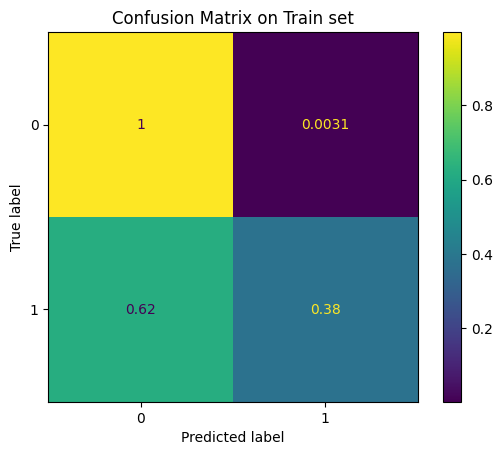

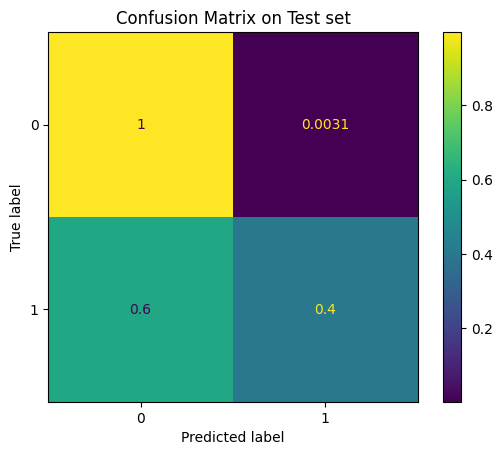

In [48]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
# taille de la figure
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
plt.show()

Les performances sont meilleures, mais on ne détecte que 40% des transactions frauduleuses. 

On va voir si on peut améliorer encore en changeant de modèle pour passer sur un random forest

##### Test random forest

In [49]:
forest_classifier = RandomForestClassifier(class_weight=weights, random_state=42)
forest_classifier.fit(X_train,Y_train)

RandomForestClassifier(class_weight={0: 1, 1: 9}, random_state=42)

In [50]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = forest_classifier.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = forest_classifier.predict_proba(X_train)
print("...Done.")
print(Y_train_proba[:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = forest_classifier.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = forest_classifier.predict_proba(X_test)
print("...Done.")
print(Y_test_proba[:5])
print()

Predictions on training set...
...Done.
[0 0 0 0 0]

Probabilities on training set...
...Done.
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

Predictions on test set...
...Done.
[0 0 0 0 0]

Probabilities on test set...
...Done.
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]



In [51]:
print("Classification report on train set:")
print(classification_report(Y_train, Y_train_pred))
print()
print("Classification report on test set:")
print(classification_report(Y_test, Y_test_pred))

Classification report on train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    442859
           1       1.00      1.00      1.00      1716

    accuracy                           1.00    444575
   macro avg       1.00      1.00      1.00    444575
weighted avg       1.00      1.00      1.00    444575


Classification report on test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.96      0.54      0.69       429

    accuracy                           1.00    111144
   macro avg       0.98      0.77      0.85    111144
weighted avg       1.00      1.00      1.00    111144



In [52]:
# Calcul des métriques et stockage des performances du modèle
model_name = "Simple Random Forest"
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1 = f1_score(Y_train, Y_train_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1 = f1_score(Y_test, Y_test_pred)

models_perfs.append({
    'Model': model_name,
    'Train Precision': train_precision,
    'Train Recall': train_recall,
    'Train F1-Score': train_f1,
    'Test Precision': test_precision,
    'Test Recall': test_recall,
    'Test F1-Score': test_f1
})

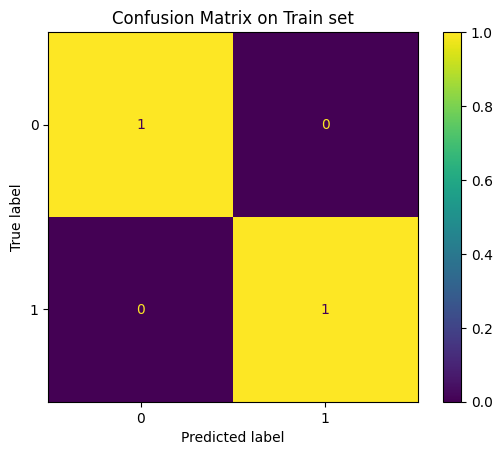

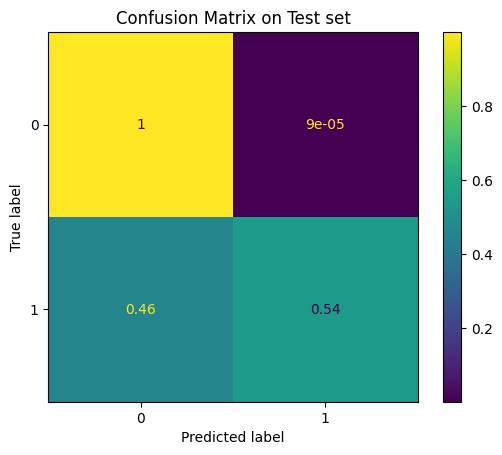

In [53]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(forest_classifier, X_train, Y_train, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(forest_classifier, X_test, Y_test, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
plt.show()

##### Random forest avec gridsearch

In [54]:
# on va essayer d'améliorer les performances en faisant un gridsearch pour optimiser les hyperparamètres du modèle

# recherche des hyperparamètre
# Perform grid search
print("Grid search...")
weights = {1:9,0:1}
classifier = RandomForestClassifier(class_weight=weights, random_state=42)

# Grid of values to be tested
params = {
    'n_estimators': [5, 10, 20, 50],
    'min_samples_split' : [2, 5, 10]
}
gridsearch = GridSearchCV(classifier, param_grid = params, scoring='recall', cv = 3, verbose=2) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ................min_samples_split=2, n_estimators=5; total time=   9.2s
[CV] END ................min_samples_split=2, n_estimators=5; total time=   9.0s
[CV] END ................min_samples_split=2, n_estimators=5; total time=   8.6s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  15.1s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  14.2s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  13.5s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  25.9s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  25.5s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  26.3s
[CV] END ...............min_samples_split=2, n_estimators=50; total time= 1.1min
[CV] END ...............min_samples_split=2, n_estimators=50; total time= 1.1min
[CV] END ...............min_sampl

In [55]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba[:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba[:5])
print()

Predictions on training set...
...Done.
[0 0 0 0 0]

Probabilities on training set...
...Done.
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

Predictions on test set...
...Done.
[0 0 0 0 0]

Probabilities on test set...
...Done.
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]



In [56]:
print("Classification report on train set:")
print(classification_report(Y_train, Y_train_pred))
print()
print("Classification report on test set:")
print(classification_report(Y_test, Y_test_pred))

Classification report on train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    442859
           1       0.92      0.87      0.90      1716

    accuracy                           1.00    444575
   macro avg       0.96      0.93      0.95    444575
weighted avg       1.00      1.00      1.00    444575


Classification report on test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.80      0.63      0.70       429

    accuracy                           1.00    111144
   macro avg       0.90      0.81      0.85    111144
weighted avg       1.00      1.00      1.00    111144



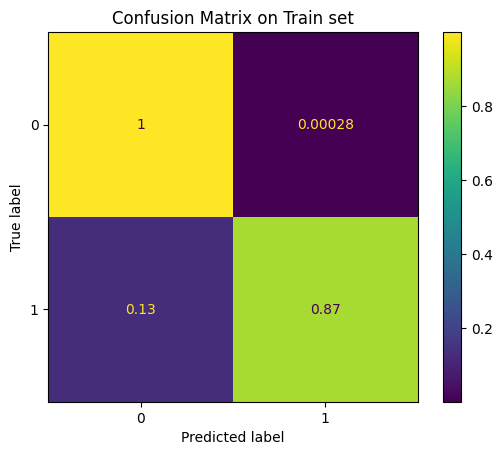

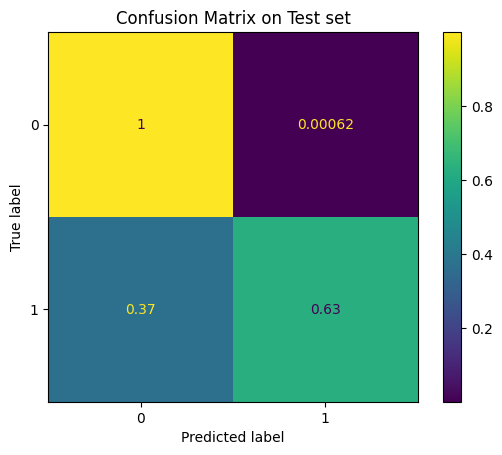

In [57]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
plt.show()

In [58]:
# Calcul des métriques et stockage des performances du modèle
model_name = "Optimized Random Forest"
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1 = f1_score(Y_train, Y_train_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1 = f1_score(Y_test, Y_test_pred)

models_perfs.append({
    'Model': model_name,
    'Train Precision': train_precision,
    'Train Recall': train_recall,
    'Train F1-Score': train_f1,
    'Test Precision': test_precision,
    'Test Recall': test_recall,
    'Test F1-Score': test_f1
})

##### Test modèle XGBoost

In [59]:
# Créer le modèle
xgb = XGBClassifier(
    scale_pos_weight=len(Y[Y==0])/len(Y[Y==1]),  # Pour gérer le déséquilibre
    random_state=42
)
xgb.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [60]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = xgb.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = xgb.predict_proba(X_train)
print("...Done.")
print(Y_train_proba[:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = xgb.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = xgb.predict_proba(X_test)
print("...Done.")
print(Y_test_proba[:5])
print()

Predictions on training set...
...Done.
[0 0 0 0 0]

Probabilities on training set...
...Done.
[[9.9613082e-01 3.8691685e-03]
 [9.9950188e-01 4.9809983e-04]
 [9.9997902e-01 2.1000935e-05]
 [9.9998087e-01 1.9143790e-05]
 [9.9838865e-01 1.6113528e-03]]

Predictions on test set...
...Done.
[0 0 0 0 0]

Probabilities on test set...
...Done.
[[9.9996966e-01 3.0317557e-05]
 [9.9994451e-01 5.5464116e-05]
 [9.9999154e-01 8.4655367e-06]
 [9.9813884e-01 1.8611355e-03]
 [9.9999732e-01 2.6686407e-06]]



In [61]:
print("Classification report on train set:")
print(classification_report(Y_train, Y_train_pred))
print()
print("Classification report on test set:")
print(classification_report(Y_test, Y_test_pred))

Classification report on train set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    442859
           1       0.39      1.00      0.56      1716

    accuracy                           0.99    444575
   macro avg       0.69      1.00      0.78    444575
weighted avg       1.00      0.99      1.00    444575


Classification report on test set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    110715
           1       0.34      0.93      0.50       429

    accuracy                           0.99    111144
   macro avg       0.67      0.96      0.75    111144
weighted avg       1.00      0.99      0.99    111144



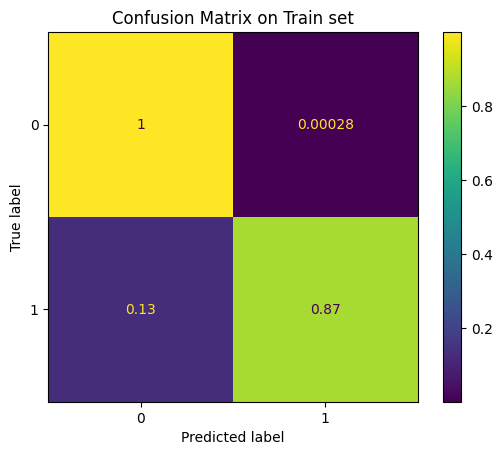

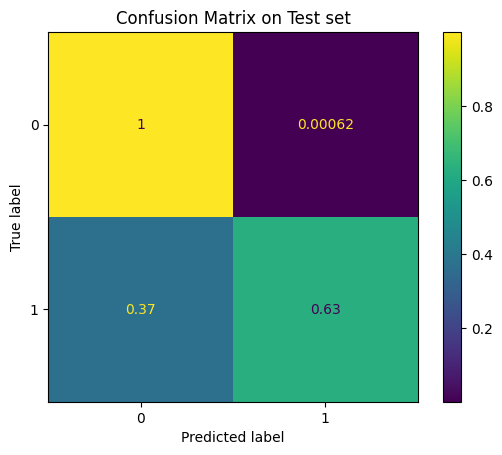

In [62]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
plt.show()

In [63]:
# Calcul des métriques et stockage des performances du modèle
model_name = "Simple xgboost"
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1 = f1_score(Y_train, Y_train_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1 = f1_score(Y_test, Y_test_pred)

models_perfs.append({
    'Model': model_name,
    'Train Precision': train_precision,
    'Train Recall': train_recall,
    'Train F1-Score': train_f1,
    'Test Precision': test_precision,
    'Test Recall': test_recall,
    'Test F1-Score': test_f1
})

##### Gridsearch sur XGboost

In [64]:
# on va essayer d'améliorer les performances en faisant un gridsearch pour optimiser les hyperparamètres du modèle

# recherche des hyperparamètre
# Perform grid search
print("Grid search...")
classifier = XGBClassifier(scale_pos_weight=len(Y[Y==0])/len(Y[Y==1]), eval_metric='aucpr', random_state=42)

# Grid of values to be tested
params = {
    'n_estimators': [50, 100, 200],
    'max_depth' : [3, 5],
    'learning_rate' : [0.1, 0.3, 0.5],
    'min_child_weight' : [1, 3, 5]
}
gridsearch = GridSearchCV(classifier, param_grid = params, scoring='recall', cv = 3, verbose=2) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   3.5s
[CV] END learning_rate=0.1, max_depth=3, min

In [65]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba[:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred[:5])
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba[:5])
print()

Predictions on training set...
...Done.
[0 0 0 0 0]

Probabilities on training set...
...Done.
[[5.0450099e-01 4.9549901e-01]
 [9.3390453e-01 6.6095464e-02]
 [9.9586600e-01 4.1340189e-03]
 [9.9963951e-01 3.6048537e-04]
 [8.9093095e-01 1.0906903e-01]]

Predictions on test set...
...Done.
[0 0 0 0 0]

Probabilities on test set...
...Done.
[[0.9928073  0.0071927 ]
 [0.9971853  0.00281472]
 [0.9967973  0.00320269]
 [0.97983193 0.02016807]
 [0.99756294 0.00243708]]



In [66]:
print("Classification report on train set:")
print(classification_report(Y_train, Y_train_pred))
print()
print("Classification report on test set:")
print(classification_report(Y_test, Y_test_pred))

Classification report on train set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    442859
           1       0.12      0.99      0.22      1716

    accuracy                           0.97    444575
   macro avg       0.56      0.98      0.60    444575
weighted avg       1.00      0.97      0.98    444575


Classification report on test set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    110715
           1       0.12      0.97      0.21       429

    accuracy                           0.97    111144
   macro avg       0.56      0.97      0.60    111144
weighted avg       1.00      0.97      0.98    111144



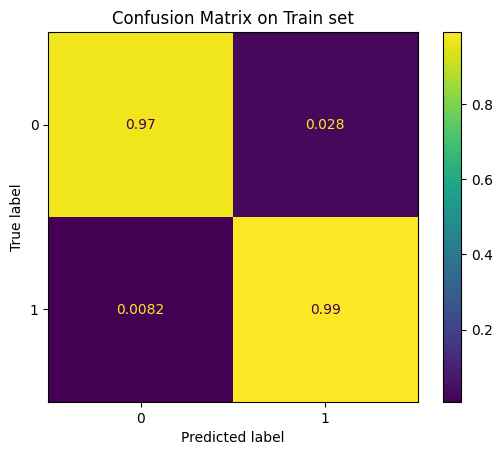

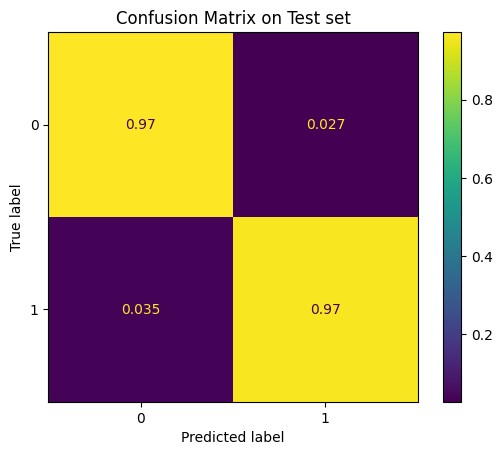

In [67]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax, normalize='true') # ConfusionMatrixDisplay from sklearn
plt.show()

In [68]:
# Calcul des métriques et stockage des performances du modèle
model_name = "Optimized xgboost"
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1 = f1_score(Y_train, Y_train_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1 = f1_score(Y_test, Y_test_pred)

models_perfs.append({
    'Model': model_name,
    'Train Precision': train_precision,
    'Train Recall': train_recall,
    'Train F1-Score': train_f1,
    'Test Precision': test_precision,
    'Test Recall': test_recall,
    'Test F1-Score': test_f1
})

##### Comparaison des résultats de chaque modèle


=== COMPARAISON DES MODÈLES ===


,Model,Train Precision,Train Recall,Train F1-Score,Test Precision,Test Recall,Test F1-Score
0,Simple Logistic Regression,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Weighted Logistic Regression,0.322372,0.377040,0.347569,0.334630,0.400932,0.364793
2,Simple Random Forest,1.000000,1.000000,1.000000,0.958848,0.543124,0.693452
3,Optimized Random Forest,0.923220,0.868881,0.895227,0.796460,0.629371,0.703125
4,Simple xgboost,0.389204,1.000000,0.560327,0.336984,0.932401,0.495050
5,Optimized xgboost,0.120795,0.991841,0.215361,0.120314,0.965035,0.213953


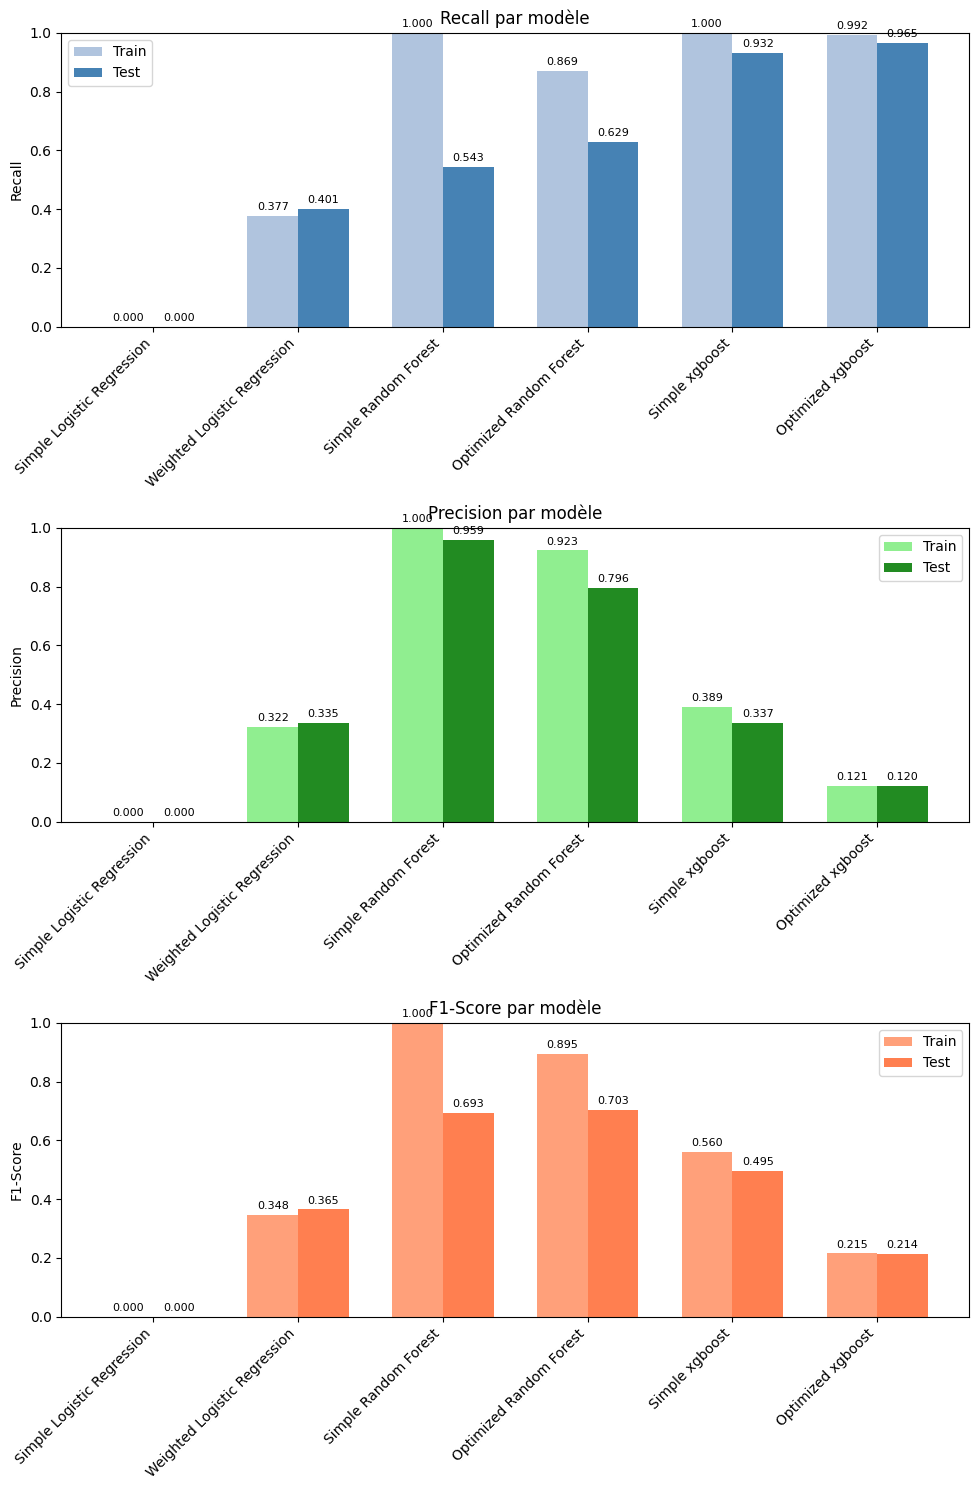

In [69]:
# Créer le DataFrame de comparaison
df_results = pd.DataFrame(models_perfs)
# df_results = df_results.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("\n=== COMPARAISON DES MODÈLES ===")
display(df_results)

# Visualisation 
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Configuration pour les barres groupées
x = np.arange(len(df_results['Model']))
width = 0.35

# Graphique Recall
bars1 = ax[0].bar(x - width/2, df_results['Train Recall'], width, label='Train', color='lightsteelblue')
bars2 = ax[0].bar(x + width/2, df_results['Test Recall'], width, label='Test', color='steelblue')
ax[0].set_title('Recall par modèle')
ax[0].set_ylabel('Recall')
ax[0].set_ylim(0, 1)
ax[0].set_xticks(x)
ax[0].set_xticklabels(df_results['Model'], rotation=45, ha='right')
ax[0].legend()
# Annotations pour Train
for i, v in enumerate(df_results['Train Recall']):
    ax[0].text(i - width/2, v + 0.02, f'{v:.3f}', ha='center', fontsize=8)
# Annotations pour Test
for i, v in enumerate(df_results['Test Recall']):
    ax[0].text(i + width/2, v + 0.02, f'{v:.3f}', ha='center', fontsize=8)

# Graphique Precision
bars1 = ax[1].bar(x - width/2, df_results['Train Precision'], width, label='Train', color='lightgreen')
bars2 = ax[1].bar(x + width/2, df_results['Test Precision'], width, label='Test', color='forestgreen')
ax[1].set_title('Precision par modèle')
ax[1].set_ylabel('Precision')
ax[1].set_ylim(0, 1)
ax[1].set_xticks(x)
ax[1].set_xticklabels(df_results['Model'], rotation=45, ha='right')
ax[1].legend()
# Annotations pour Train
for i, v in enumerate(df_results['Train Precision']):
    ax[1].text(i - width/2, v + 0.02, f'{v:.3f}', ha='center', fontsize=8)
# Annotations pour Test
for i, v in enumerate(df_results['Test Precision']):
    ax[1].text(i + width/2, v + 0.02, f'{v:.3f}', ha='center', fontsize=8)


# Graphique F1-Score
bars3 = ax[2].bar(x - width/2, df_results['Train F1-Score'], width, label='Train', color='lightsalmon')
bars4 = ax[2].bar(x + width/2, df_results['Test F1-Score'], width, label='Test', color='coral')
ax[2].set_title('F1-Score par modèle')
ax[2].set_ylabel('F1-Score')
ax[2].set_ylim(0, 1)
ax[2].set_xticks(x)
ax[2].set_xticklabels(df_results['Model'], rotation=45, ha='right')
ax[2].legend()
# Annotations pour Train
for i, v in enumerate(df_results['Train F1-Score']):
    ax[2].text(i - width/2, v + 0.02, f'{v:.3f}', ha='center', fontsize=8)
# Annotations pour Test
for i, v in enumerate(df_results['Test F1-Score']):
    ax[2].text(i + width/2, v + 0.02, f'{v:.3f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


Parmi tous les modèles testés, on peut conclure que : 
- la régression logistique ne permet pas de bonnes performances
- les modèles de random forest offrent de bonnes performances sur la détection de fraude mais ont tendance à overfit
- le modèle xgboost avant grid search offre de bonnes performances sur la détection des fraudes (93% de recall sur le jeu de test) et un bon équilibre entre détecter les fraudes et minimiser les fausses aletres
- le modèle xgboost optimisé avec le gridsearch détecte un peu plus de fraudes (96% au lieu des 93% avant grid search) mais déclenche braucoup plus de fausses alertes.

Il faudra voir avec le métier s'il souhaite orienter la recherche uniquement sur la détection de fraude quitte à avoir beaucoup de fausses aletres, ou s'il préfère une version un peu plus équilibrée.